In [0]:
import os
from fastai import *
from fastai.vision import *

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%%time
!cp 'drive/My Drive/Fellowship/Data/modanet_data.zip' .
!unzip modanet_data.zip >/dev/null

CPU times: user 192 ms, sys: 40.9 ms, total: 233 ms
Wall time: 41.8 s


In [0]:
labels = pd.read_csv('./drive/My Drive/Fellowship/ModaNet/ModaNetLabels.csv')
modanet_directory = set(os.listdir('modanet_data/'))
labels_image = set(labels.file_name)
not_exist = list(labels_image - modanet_directory)
labels = labels[~labels['file_name'].isin(list(not_exist))].reset_index(drop=True)

In [0]:
labels.head()

,Unnamed: 0,post_id,path,status,file_file_name,file_file_size,file_content_type,file_updated_at,width,height,created_at,updated_at,url,image_id,file_name,label
0,0,73,/photos/thefashbot/3613535083/3420751783/34207...,2,open-uri20120907-29328-1uz77bi,115073,image/jpeg,2012-09-07 23:07:46.825511,400,600,2012-09-07 23:07:45.785651,2012-09-07 23:07:47.722063,http://images2.chictopia.com//photos/thefashbo...,3,34207517833420751783_400.jpg,pants;footwear;top;outer
1,1,142,/photos/thefashbot/2353856772/2353856772_400.jpg,2,open-uri20120907-29328-s7gmu,106894,image/jpeg,2012-09-07 23:08:31.073256,400,600,2012-09-07 23:08:30.687548,2012-09-07 23:08:32.031942,http://images2.chictopia.com//photos/thefashbo...,13,23538567722353856772_400.jpg,top;headwear;outer;pants;footwear;shorts
2,2,79,/photos/poppylee/3083327112/3083327112_400.jpg,2,open-uri20120907-29328-1l7sf9u,124987,image/jpeg,2012-09-07 23:14:50.212592,400,600,2012-09-07 23:14:49.805666,2012-09-07 23:14:50.742101,http://images2.chictopia.com//photos/poppylee/...,148,30833271123083327112_400.jpg,skirt;top;pants;footwear
3,3,104,/photos/poppylee/8150270690/8150270690_400.jpg,2,open-uri20120907-29328-v7lh6v,126139,image/jpeg,2012-09-07 23:15:06.192652,400,600,2012-09-07 23:15:05.860767,2012-09-07 23:15:06.622103,http://images2.chictopia.com//photos/poppylee/...,156,81502706908150270690_400.jpg,dress;footwear;belt
4,4,353,/photos/Carolina/7809452194/7809452194_400.jpg,2,open-uri20120907-29328-1x0oi3x,208504,image/jpeg,2012-09-07 23:15:40.865098,400,600,2012-09-07 23:15:39.440233,2012-09-07 23:15:41.682777,http://images2.chictopia.com//photos/Carolina/...,174,78094521947809452194_400.jpg,bag;dress;footwear;sunglasses;belt


In [0]:
len(set(os.listdir('modanet_data/')) - set(labels.file_name))

123

In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
%%time
path = './modanet_data'
data = (ImageList.from_df(labels[['file_name', 'label']].dropna(), path)
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=';')
       .transform(tfms, size=128)
       .databunch())

CPU times: user 1.66 s, sys: 93 ms, total: 1.75 s
Wall time: 1.88 s


In [0]:
data.classes

['bag',
 'belt',
 'boots',
 'dress',
 'footwear',
 'headwear',
 'outer',
 'pants',
 'scarf/tie',
 'shorts',
 'skirt',
 'sunglasses',
 'top']

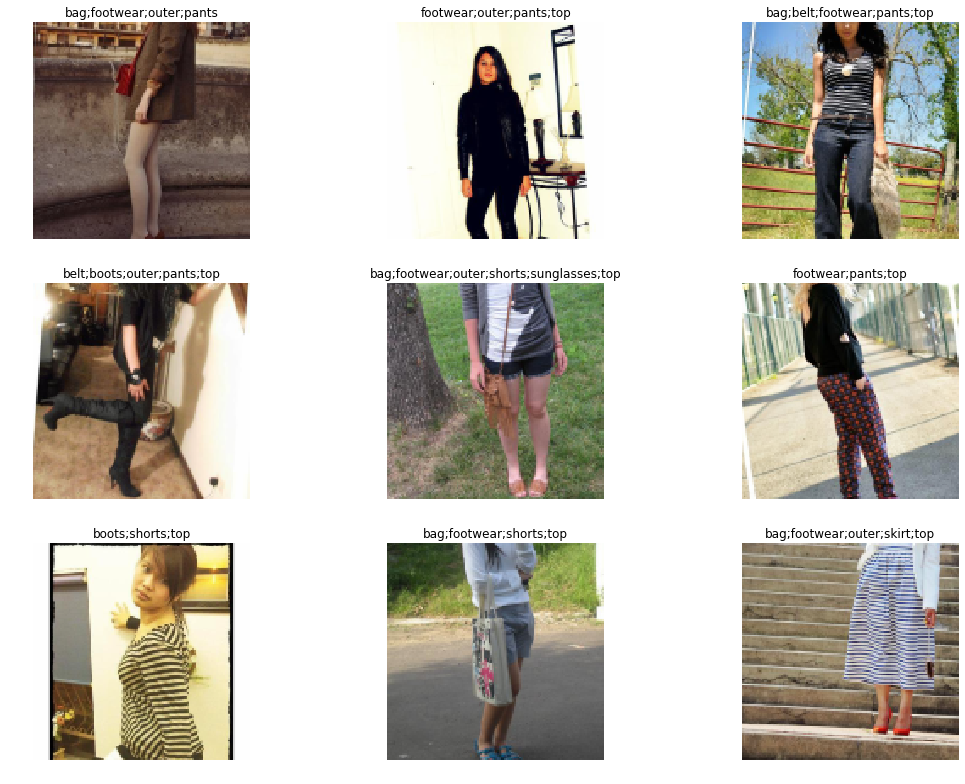

In [0]:
data.show_batch(rows=3, figsize=(15,11))

In [0]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy_thresh])

In [0]:
%time
learn.lr_find()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


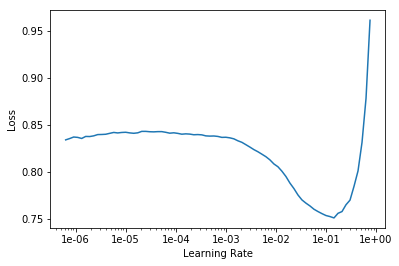

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-02

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.468274,0.447936,0.797734,08:45
1,0.429030,0.412425,0.820353,08:50
2,0.414595,0.399706,0.825221,08:53
3,0.405192,0.390070,0.831018,08:55
4,0.396155,0.387712,0.831600,08:57


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


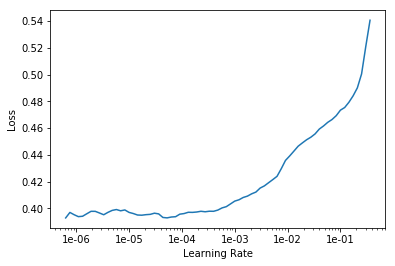

In [0]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(6, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.294574,0.321027,0.869171,09:02
1,0.309429,0.331149,0.864162,08:49
2,0.304528,0.324449,0.868449,08:37
3,0.282061,0.313606,0.872139,08:33
4,0.262719,0.310408,0.875284,08:31
5,0.244185,0.312183,0.875711,08:31


In [0]:
learn.save('fashion_resnet34_87', return_path=True)

PosixPath('modanet_data/models/fashion_resnet34_87.pth')

In [0]:
learn.save('resnet50-86')

## Resnet50

In [14]:
arch = models.resnet50
learn1 = cnn_learner(data, arch, metrics=[accuracy_thresh])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 79013707.80it/s]


In [0]:
%%time
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 13.2 s, sys: 8.13 s, total: 21.3 s
Wall time: 1min 13s


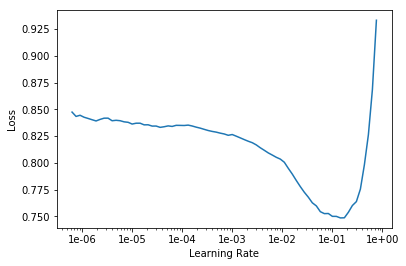

In [0]:
learn1.recorder.plot()

In [0]:
lr = 1e-02

In [15]:
learn1.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.448296,0.424757,0.812561,09:01
1,0.396208,0.385056,0.835710,08:46
2,0.380093,0.363442,0.846110,08:39
3,0.364289,0.354143,0.851229,08:39
4,0.357113,0.351530,0.852539,08:38


In [0]:
learn1.unfreeze()

In [0]:
learn1.lr_find()
learn1.recorder.plot()

In [17]:
learn1.fit_one_cycle(6, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.361667,0.356831,0.851715,09:07
1,0.354789,0.346709,0.855581,08:56
2,0.329279,0.326751,0.865451,08:54
3,0.305720,0.307357,0.875365,08:50
4,0.281535,0.296016,0.880064,08:49
5,0.270818,0.294345,0.881868,08:48


In [0]:
learn1.save('fashion_resnet50_88')